In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


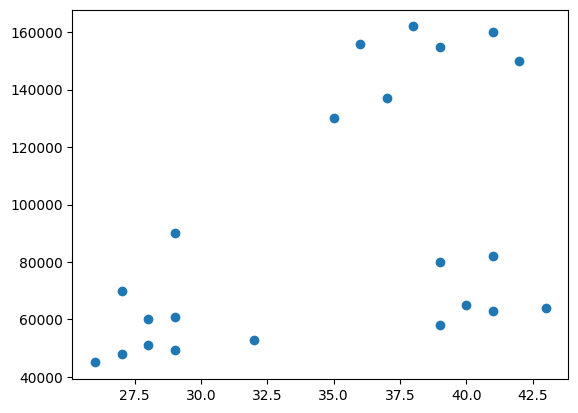

In [3]:
plt.scatter(df.Age, df['Income($)'])

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


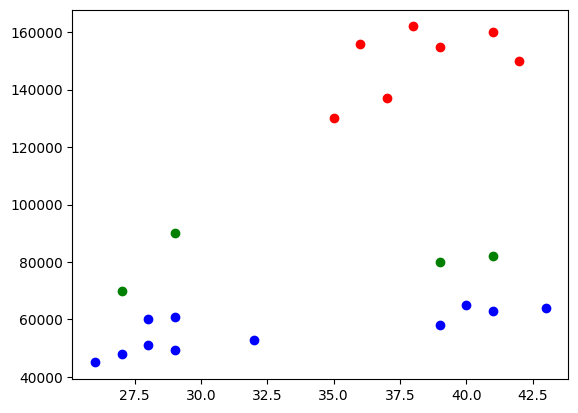

In [8]:
plt.scatter(df['Age'][df.cluster==0],df['Income($)'][df.cluster==0], color='g')
plt.scatter(df['Age'][df.cluster==1],df['Income($)'][df.cluster==1], color='r')
plt.scatter(df['Age'][df.cluster==2],df['Income($)'][df.cluster==2], color='b')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df.head()
scaler.fit(df[['Age']])
df.Age=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [10]:
from sklearn.cluster import KMeans
km = KMeans()

In [11]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 3, 1, 1, 4, 2, 4, 2, 2, 6, 6, 1, 1, 1, 1, 7, 5, 5, 5, 0, 0, 5])

In [12]:
km.cluster_centers_

array([[0.82352941, 0.30769231],
       [0.10084034, 0.08485958],
       [0.68627451, 0.96296296],
       [0.17647059, 0.38461538],
       [0.91176471, 0.94017094],
       [0.86764706, 0.14957265],
       [0.58823529, 0.75641026],
       [0.35294118, 0.06837607]])

In [13]:
df['cluster']=y_predicted

In [14]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,3
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,4


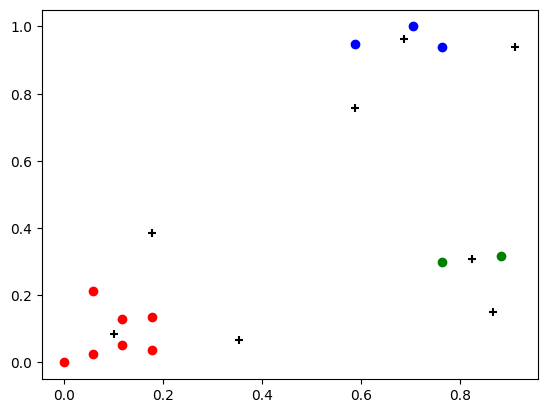

In [15]:
plt.scatter(df['Age'][df.cluster==0],df['Income($)'][df.cluster==0], color='g')
plt.scatter(df['Age'][df.cluster==1],df['Income($)'][df.cluster==1], color='r')
plt.scatter(df['Age'][df.cluster==2],df['Income($)'][df.cluster==2], color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color="black", marker="+", label='Centroid')

In [16]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

In [17]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.2766936276300279,
 0.2187801089333045,
 0.16869711728567788,
 0.13265419827245162,
 0.10188787724979426]

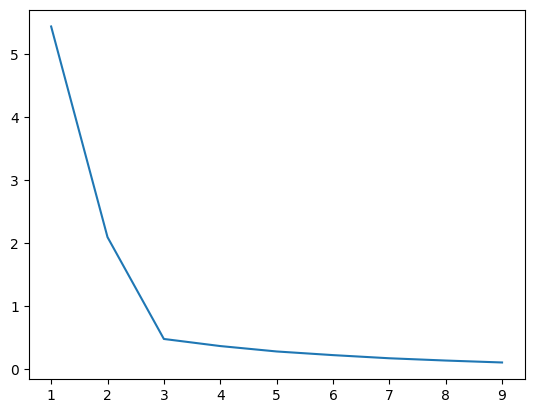

In [18]:
plt.plot(k_range,sse)

# Exercise 

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [75]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [76]:
df.head()
df.drop(['sepal length (cm)','sepal width (cm)'], axis=1, inplace=True)


In [77]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [78]:
df['petal length (cm)']=scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)']=scaler.fit_transform(df[['petal width (cm)']])

In [79]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


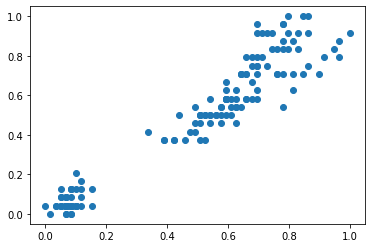

In [80]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [89]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [90]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [91]:
df['cluster'] = y_predicted

In [92]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [93]:
df.cluster.unique()

array([0, 1, 2])

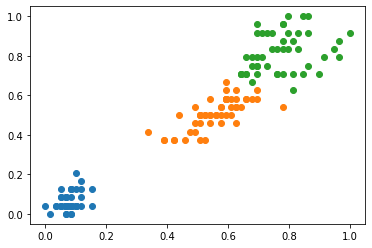

In [94]:
for k in range(len(df.cluster.unique())):
    plt.scatter(df['petal length (cm)'][df.cluster==k],df['petal width (cm)'][df.cluster==k])

In [95]:
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [96]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6883515870198608,
 0.5651273455703979,
 0.5020728700409468,
 0.41379856889910943]

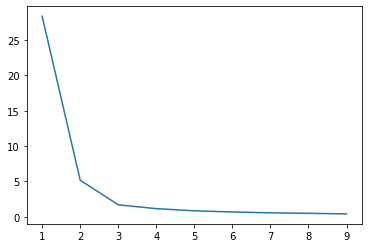

In [97]:
plt.plot(range(1,10), sse)